# Implementing a simple two layers neural network
In this exercise we will develop a two neural network with fully-connected layers to perform classification, and test it out on the MNIST dataset.


In [7]:
"""
-----------------------------------------------------------------------------
A simple two layers neural network for handwritten digit classification (MNIST)
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import copy

from first_nn_sol import *

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read MNIST data:
You can download the data from [here](https://yann.lecun.com/exdb/mnist/). There are many [way](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


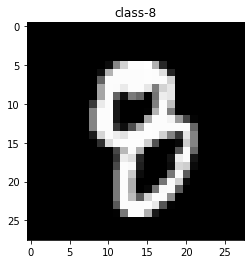

In [8]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '../Assignment_1/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)

print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))



rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()



# TODO: Create a validation data from training data (10%) and transform the data in $\mathbf{R}^d$.

In [9]:
val_data_ration = 0.1
class_ids = list(set(train_labels))
val_ids = []
for cl in class_ids:
    temp_val_index = np.where(train_labels==cl)
    val_ids.extend(list(np.random.permutation(temp_val_index[0])[:round(temp_val_index[0].shape[0]*val_data_ration)]))
# print(val_ids)     
val_images = train_images[val_ids, :, :]  
val_labels = train_labels[val_ids]  
print('Val data (X) size: {}, and labels (Y) size: {}' .format(val_images.shape, val_labels.shape))

train_ids = [i for i in range(train_labels.shape[0]) if i not in val_labels]
revised_train_images = train_images[train_ids, :, :]  
revised_train_labels = train_labels[train_ids]  
 
X_train = revised_train_images.reshape(revised_train_images.shape[0], -1)
Y_train = revised_train_labels.reshape(-1)
X_val = val_images.reshape(val_images.shape[0], -1)
Y_val = val_labels.reshape(-1)
X_test = test_images.reshape(test_images.shape[0], -1)
Y_test = test_labels.reshape(-1)

print('After reshape\n')
print('Train data (X) size: {}, and labels (Y) size: {}' .format(X_train.shape, Y_train.shape))
print('Val data (X) size: {}, and labels (Y) size: {}' .format(X_val.shape, Y_val.shape))
print('Test data (X) size: {}, and labels (Y) size: {}' .format(X_test.shape, Y_test.shape))



                        
                        

Val data (X) size: (5999, 28, 28), and labels (Y) size: (5999,)
After reshape

Train data (X) size: (59990, 784), and labels (Y) size: (59990,)
Val data (X) size: (5999, 784), and labels (Y) size: (5999,)
Test data (X) size: (10000, 784), and labels (Y) size: (10000,)


# Train a network
To train our network we will use Stochastic Gradient Decent (SGD).

In [16]:
data_dimension = X_train.shape[1]
num_hidden_nodes = 50
num_classes = 10
param_init="small_std"
net = FirstNN(data_dimension, num_hidden_nodes, num_classes, param_inits=param_init)

# Train the network
stats = net.train(X_train, Y_train, X_val, Y_val, 
                  num_iters=10000,
                  num_epoch=30,
                  batch_size=200, 
                  learning_rate=1e-2, 
                  update_rule="m_gd",
                  beta_moment=1e-1,
                  verbose=True
                 )





Training epoch 1/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 1.137986: 100%|██████████| 300/300 [00:01<00:00, 245.23it/s]


epoch: 1 / (30), loss: 1.616773, train acc: 83.68, val acc: 84.08
Training epoch 2/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.785912: 100%|██████████| 300/300 [00:01<00:00, 228.73it/s]


epoch: 2 / (30), loss: 0.915769, train acc: 88.92, val acc: 89.08
Training epoch 3/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.652103: 100%|██████████| 300/300 [00:01<00:00, 212.50it/s]


epoch: 3 / (30), loss: 0.673383, train acc: 89.30, val acc: 89.55
Training epoch 4/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.471903: 100%|██████████| 300/300 [00:01<00:00, 268.50it/s]


epoch: 4 / (30), loss: 0.552292, train acc: 90.75, val acc: 91.22
Training epoch 5/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.384663: 100%|██████████| 300/300 [00:01<00:00, 212.71it/s]


epoch: 5 / (30), loss: 0.475120, train acc: 91.27, val acc: 91.40
Training epoch 6/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.385941: 100%|██████████| 300/300 [00:01<00:00, 240.90it/s]


epoch: 6 / (30), loss: 0.423629, train acc: 91.58, val acc: 91.83
Training epoch 7/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.332311: 100%|██████████| 300/300 [00:01<00:00, 251.41it/s]


epoch: 7 / (30), loss: 0.384237, train acc: 92.02, val acc: 91.83
Training epoch 8/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.322806: 100%|██████████| 300/300 [00:01<00:00, 202.28it/s]


epoch: 8 / (30), loss: 0.356764, train acc: 92.26, val acc: 92.65
Training epoch 9/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.390393: 100%|██████████| 300/300 [00:01<00:00, 236.40it/s]


epoch: 9 / (30), loss: 0.335687, train acc: 92.90, val acc: 93.08
Training epoch 10/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.258582: 100%|██████████| 300/300 [00:01<00:00, 257.61it/s]


epoch: 10 / (30), loss: 0.317070, train acc: 93.00, val acc: 92.57
Training epoch 11/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.295751: 100%|██████████| 300/300 [00:01<00:00, 243.66it/s]


epoch: 11 / (30), loss: 0.302434, train acc: 92.91, val acc: 92.83
Training epoch 12/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.270800: 100%|██████████| 300/300 [00:01<00:00, 221.69it/s]


epoch: 12 / (30), loss: 0.291478, train acc: 93.08, val acc: 93.02
Training epoch 13/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.207776: 100%|██████████| 300/300 [00:01<00:00, 261.95it/s]


epoch: 13 / (30), loss: 0.281251, train acc: 93.47, val acc: 93.25
Training epoch 14/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.223669: 100%|██████████| 300/300 [00:01<00:00, 259.49it/s]


epoch: 14 / (30), loss: 0.270010, train acc: 93.58, val acc: 93.52
Training epoch 15/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.240158: 100%|██████████| 300/300 [00:01<00:00, 274.20it/s]


epoch: 15 / (30), loss: 0.264761, train acc: 93.77, val acc: 93.73
Training epoch 16/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.217671: 100%|██████████| 300/300 [00:01<00:00, 262.86it/s]


epoch: 16 / (30), loss: 0.255487, train acc: 93.70, val acc: 93.25
Training epoch 17/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.259217: 100%|██████████| 300/300 [00:01<00:00, 246.29it/s]


epoch: 17 / (30), loss: 0.248897, train acc: 94.06, val acc: 93.92
Training epoch 18/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.246302: 100%|██████████| 300/300 [00:01<00:00, 213.11it/s]


epoch: 18 / (30), loss: 0.243995, train acc: 93.97, val acc: 93.87
Training epoch 19/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.279100: 100%|██████████| 300/300 [00:01<00:00, 249.48it/s]


epoch: 19 / (30), loss: 0.238952, train acc: 93.59, val acc: 93.57
Training epoch 20/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.249157: 100%|██████████| 300/300 [00:01<00:00, 223.46it/s]


epoch: 20 / (30), loss: 0.237014, train acc: 94.01, val acc: 93.73
Training epoch 21/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.212606: 100%|██████████| 300/300 [00:01<00:00, 237.39it/s]


epoch: 21 / (30), loss: 0.228943, train acc: 94.17, val acc: 93.97
Training epoch 22/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.240587: 100%|██████████| 300/300 [00:01<00:00, 251.04it/s]


epoch: 22 / (30), loss: 0.224775, train acc: 94.35, val acc: 94.05
Training epoch 23/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.166572: 100%|██████████| 300/300 [00:01<00:00, 217.50it/s]


epoch: 23 / (30), loss: 0.218949, train acc: 94.54, val acc: 94.17
Training epoch 24/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.180035: 100%|██████████| 300/300 [00:01<00:00, 230.43it/s]


epoch: 24 / (30), loss: 0.217191, train acc: 94.40, val acc: 94.33
Training epoch 25/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.368032: 100%|██████████| 300/300 [00:01<00:00, 240.75it/s]


epoch: 25 / (30), loss: 0.213001, train acc: 94.44, val acc: 94.50
Training epoch 26/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.219597: 100%|██████████| 300/300 [00:01<00:00, 267.61it/s]
/home/biswajit/Documents/RKMVERI_3RD/class/DL_NLP/Assignment_1_c/first_nn_sol.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


epoch: 26 / (30), loss: 0.210170, train acc: 94.53, val acc: 94.43
Training epoch 27/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.236221: 100%|██████████| 300/300 [00:01<00:00, 221.85it/s]


epoch: 27 / (30), loss: 0.206753, train acc: 94.77, val acc: 94.68
Training epoch 28/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.118301: 100%|██████████| 300/300 [00:01<00:00, 219.32it/s]


epoch: 28 / (30), loss: 0.204078, train acc: 94.91, val acc: 94.87
Training epoch 29/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.289834: 100%|██████████| 300/300 [00:01<00:00, 232.05it/s]


epoch: 29 / (30), loss: 0.199720, train acc: 94.65, val acc: 94.53
Training epoch 30/(30)
----------------------------------------------------------------------


iteration: 299 / (300), loss: 0.194910: 100%|██████████| 300/300 [00:01<00:00, 228.27it/s]


epoch: 30 / (30), loss: 0.198098, train acc: 94.95, val acc: 94.70


In [17]:
# Predict on the train set
Y_train_pred = net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 94.91
Validation accuracy: 94.87
Test accuracy: 93.86


# Plot the loss.

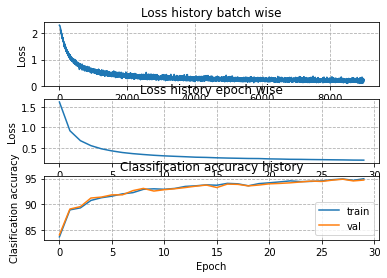

In [18]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history_batch'])
plt.title('Loss history batch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 2)
plt.plot(stats['loss_history_epoch'])
plt.title('Loss history epoch wise')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(linestyle='--')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(linestyle='--')
plt.legend()
plt.show()

# TODO: Tune your hyperparameters:
    - Learning rate:
    - Number of nodes in hidden layer:


In [19]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#################################################################################
results = {}
best_val = 0
best_net = None
learning_rates = [1e-3, 5e-3, 7e-3, 1e-2, 5e-2, 1e-1]
num_hidden_nodes = [30, 50, 60, 70, 100]
num_classes = 10
num_iters = 5000
num_epoch = 30
batch_size = 256
data_dimension = X_train.shape[1]

for nhn in num_hidden_nodes:
    for lr in learning_rates:
        
        net = FirstNN(data_dimension, nhn, num_classes)

        # Train the network
        stats = net.train(X_train, Y_train, X_val, Y_val, 
                          num_iters=num_iters,
                          num_epoch=num_epoch,
                          batch_size=batch_size, 
                          learning_rate=lr, 
                          verbose=False
                         )
            
        # Predict on the train set
        Y_train_pred = net.predict(X_train, best_param=True)
        train_acc = 100*(Y_train_pred == Y_train).mean()

        # Predict on the validation set
        Y_val_pred = net.predict(X_val, best_param=True)
        val_acc = 100*(Y_val_pred == Y_val).mean()

        results[(nhn, lr)] = (train_acc, val_acc)
        print('#hdnn: {}, lr: {} train accuracy: {:.2f} val accuracy: {:.2f}' .format(nhn, lr, train_acc, val_acc))
        if best_val < val_acc:
            best_val = val_acc
            best_net = copy.deepcopy(net)

# Print best results.
print('Best validation accuracy achieved during cross-validation: {:.2f} for #hdnn: {}, lr: {}' .format(best_val, best_net.best_params['W1'].shape[1], best_net.learning_rate))
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

#hdnn: 30, lr: 0.001 train accuracy: 88.90 val accuracy: 88.93
#hdnn: 30, lr: 0.005 train accuracy: 92.85 val accuracy: 92.82
#hdnn: 30, lr: 0.007 train accuracy: 92.19 val accuracy: 92.48
#hdnn: 30, lr: 0.01 train accuracy: 92.92 val accuracy: 92.83
#hdnn: 30, lr: 0.05 train accuracy: 91.40 val accuracy: 91.57
#hdnn: 30, lr: 0.1 train accuracy: 89.86 val accuracy: 90.17
#hdnn: 50, lr: 0.001 train accuracy: 90.96 val accuracy: 91.47
#hdnn: 50, lr: 0.005 train accuracy: 94.46 val accuracy: 94.47
#hdnn: 50, lr: 0.007 train accuracy: 94.22 val accuracy: 94.13
#hdnn: 50, lr: 0.01 train accuracy: 94.63 val accuracy: 94.72
#hdnn: 50, lr: 0.05 train accuracy: 92.85 val accuracy: 93.17
#hdnn: 50, lr: 0.1 train accuracy: 91.80 val accuracy: 91.92
#hdnn: 60, lr: 0.001 train accuracy: 91.94 val accuracy: 92.13
#hdnn: 60, lr: 0.005 train accuracy: 94.65 val accuracy: 94.67
#hdnn: 60, lr: 0.007 train accuracy: 94.93 val accuracy: 95.10
#hdnn: 60, lr: 0.01 train accuracy: 95.31 val accuracy: 95.20
#

# Test on best model

In [20]:
# Predict on the train set
Y_train_pred = best_net.predict(X_train, best_param=True)
train_acc = 100*(Y_train_pred == Y_train).mean()
print('Train accuracy: {:.2f}' .format(train_acc))

# Predict on the validation set
Y_val_pred = best_net.predict(X_val, best_param=True)
val_acc = 100*(Y_val_pred == Y_val).mean()
print('Validation accuracy: {:.2f}' .format(val_acc))

# Predict on the test set
Y_test_pred = best_net.predict(X_test, best_param=True)
test_acc = 100*(Y_test_pred == Y_test).mean()
print('Test accuracy: {:.2f}' .format(test_acc))

Train accuracy: 96.74
Validation accuracy: 96.75
Test accuracy: 95.13
